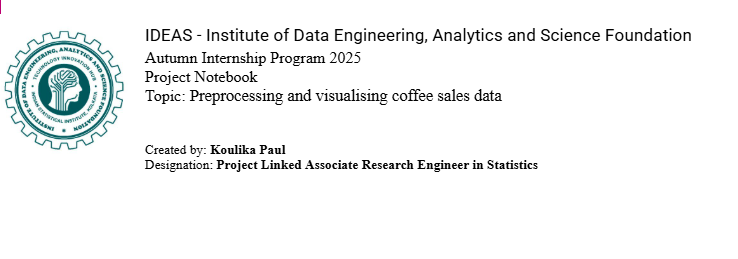

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# coffee_data=pd.read_csv("/content/Coffe_sales.csv")
coffee_data = pd.read_csv("/content/Coffe_sales.csv")
coffee_data

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.70,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.90,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.70,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000
...,...,...,...,...,...,...,...,...,...,...,...
3542,10,card,35.76,Cappuccino,Morning,Sun,Mar,7,3,2025-03-23,10:34:54.894000
3543,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,14:43:37.362000
3544,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,14:44:16.864000
3545,15,card,25.96,Americano,Afternoon,Sun,Mar,7,3,2025-03-23,15:47:28.723000


**Q1. Find the number of columns, duplicate columns, and missing values**

In [ ]:
columns = coffee_data.shape[1]
duplicate_columns = coffee_data.columns[coffee_data.T.duplicated()].tolist()
missing_values = coffee_data.isnull().sum()

print("Number of columns:", columns)
print("Duplicate columns:", duplicate_columns)
print("Missing values:\n", missing_values)


Number of columns: 11
Duplicate columns: []
Missing values:
 hour_of_day    0
cash_type      0
money          0
coffee_name    0
Time_of_Day    0
Weekday        0
Month_name     0
Weekdaysort    0
Monthsort      0
Date           0
Time           0
dtype: int64


***Basic statistics of the data***

In [ ]:
coffee_data.describe()

,hour_of_day,money,Weekdaysort,Monthsort
count,3547.000000,3547.000000,3547.000000,3547.000000
mean,14.185791,31.645216,3.845785,6.453905
std,4.234010,4.877754,1.971501,3.500754
min,6.000000,18.120000,1.000000,1.000000
25%,10.000000,27.920000,2.000000,3.000000
50%,14.000000,32.820000,4.000000,7.000000
75%,18.000000,35.760000,6.000000,10.000000
max,22.000000,38.700000,7.000000,12.000000


In [ ]:
coffee_data.dtypes

,0
hour_of_day,int64
cash_type,object
money,float64
coffee_name,object
Time_of_Day,object
Weekday,object
Month_name,object
Weekdaysort,int64
Monthsort,int64
Date,object


In [ ]:
coffee_data['Date']= pd.to_datetime(coffee_data['Date']) ## converting the object datatype to datetime
coffee_data['Month']=coffee_data['Date'].dt.month
coffee_data['Year']=(coffee_data['Date'].dt.year).astype('int')

***Average money for each year***

In [ ]:
grouped_data=coffee_data.groupby('Year')['money'].agg(np.mean)
grouped_data

/tmp/ipython-input-3058338727.py:1: FutureWarning: The provided callable <function mean at 0x7b2aa4d709a0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  grouped_data=coffee_data.groupby('Year')['money'].agg(np.mean)


,money
Year,
2024,31.737634
2025,31.390011


**Q2. Find the datatype of grouped_data**

In [ ]:
type(grouped_data)
grouped_data.dtypes

dtype('float64')

**Q3. Find the maximum money for each month**

In [ ]:
max_money =coffee_data.groupby('Month')['money'].max()
print(max_money)

Month
1     35.76
2     35.76
3     38.70
4     38.70
5     37.72
6     37.72
7     37.72
8     32.82
9     35.76
10    35.76
11    35.76
12    35.76
Name: money, dtype: float64


***Distribution of money over months***

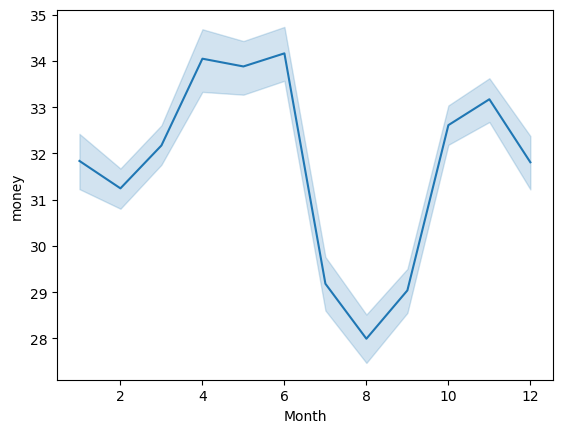

In [ ]:
sns.lineplot(x=coffee_data['Month'],y='money',data=coffee_data)
plt.show()

***The density of money over years***

<Axes: xlabel='Year', ylabel='money'>

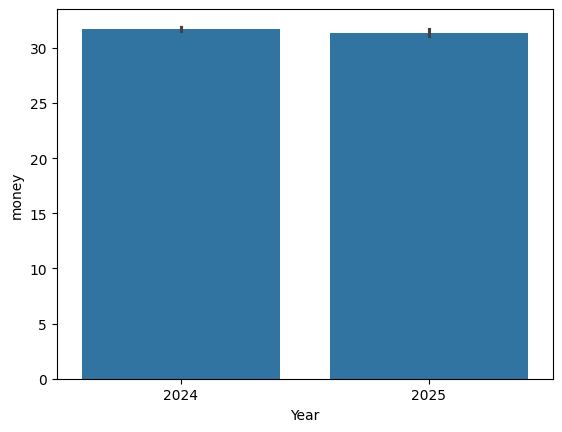

In [ ]:
sns.barplot(data= coffee_data,x='Year',y= coffee_data['money'])


**Q4. Find the distribution of money over coffee names**


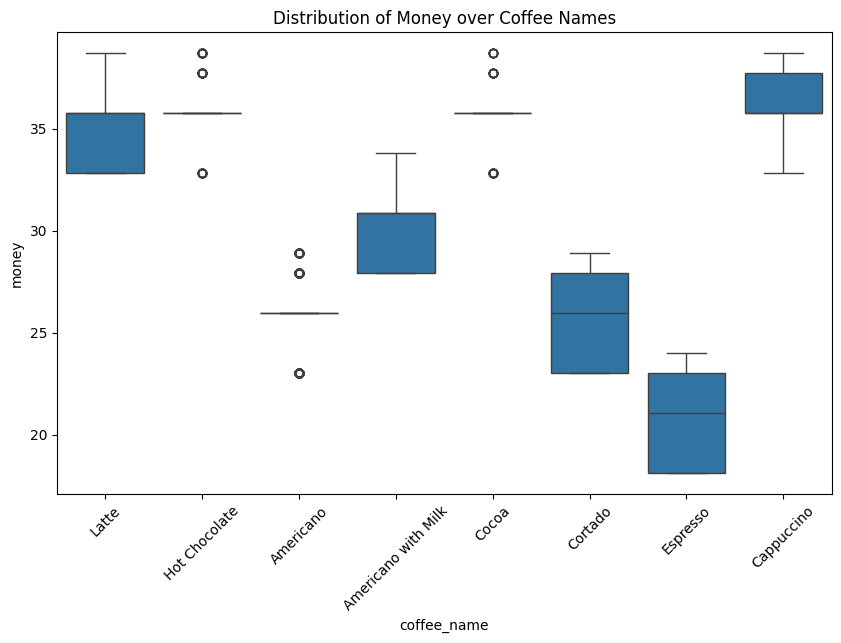

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=coffee_data, x='coffee_name', y='money')
plt.xticks(rotation=45)
plt.title("Distribution of Money over Coffee Names")
plt.show()

***Times of the Day the dataset holds***

In [ ]:
coffee_data['Time_of_Day'].value_counts()

,count
Time_of_Day,
Afternoon,1205
Morning,1181
Night,1161


**Q5. How many types of coffees are present in the dataset?**

In [ ]:
types = coffee_data['coffee_name'].nunique()
print("Number of coffee types:", types)

Number of coffee types: 8


***Max money from coffee_name***

In [ ]:
coffee_data.groupby('coffee_name')['money'].max()

,money
coffee_name,
Americano,28.9
Americano with Milk,33.8
Cappuccino,38.7
Cocoa,38.7
Cortado,28.9
Espresso,24.0
Hot Chocolate,38.7
Latte,38.7


**Q6. Find the average money made at what time of the day.**

In [ ]:
avg = coffee_data.groupby('Time_of_Day')['money'].mean()

print(avg)

Time_of_Day
Afternoon    31.643187
Morning      30.422693
Night        32.890904
Name: money, dtype: float64


***Generate 100 synthetic data rows***

In [ ]:

date_range= date_range = pd.date_range(start="2023-01-01", periods=100, freq="D")
values = np.cumsum(np.random.randn(100))
df = pd.DataFrame({"date": date_range, "value": values})
df

,date,value
0,2023-01-01,0.342624
1,2023-01-02,0.340499
2,2023-01-03,-0.161395
3,2023-01-04,1.456971
4,2023-01-05,1.042294
...,...,...
95,2023-04-06,-0.721878
96,2023-04-07,-1.082793
97,2023-04-08,-2.340940
98,2023-04-09,-2.612584


**Q7. Insert synthetic data into the given data set and analyse as above.**

In [ ]:

date_range = pd.date_range(start="2023-01-01", periods=100, freq="D")

synthetic_df = pd.DataFrame({
    "hour_of_day": np.random.randint(6, 23, size=100),
    "cash_type": np.random.choice(coffee_data['cash_type'].unique(), size=100),
    "money": np.random.randint(25, 101, size=100),
    "coffee_name": np.random.choice(coffee_data['coffee_name'].unique(), size=100),
    "Time_of_Day": np.random.choice(coffee_data['Time_of_Day'].unique(), size=100),
    "Weekday": date_range.day_name(),
    "Month_name": date_range.month_name(),
    "Weekdaysort": date_range.weekday,
    "Monthsort": date_range.month,
    "Date": date_range,
    "Time": [f"{h:02d}:{m:02d}" for h, m in zip(np.random.randint(6, 23, size=100),
                                                np.random.randint(0, 60, size=100))]
})


In [ ]:
synthetic_df['Date']= pd.to_datetime(coffee_data['Date'])
synthetic_df['Year']=(coffee_data['Date'].dt.year).astype('int')

In [ ]:
coffee_data_new = pd.concat([coffee_data, synthetic_df], ignore_index=True)


print("Original data shape:", coffee_data.shape)
print("Synthetic data shape:", synthetic_df.shape)
print("Extended data shape:", coffee_data_new.shape)


Original data shape: (3547, 13)
Synthetic data shape: (100, 12)
Extended data shape: (3647, 13)


Q1. Find the number of columns, duplicate columns, and missing  ( for synthetic dataset )


In [ ]:
columns = coffee_data_new.shape[1]
duplicate_columns = coffee_data_new.columns[coffee_data.T.duplicated()].tolist()
missing_values = coffee_data_new.isnull().sum()

print("Number of columns:", columns)
print("Duplicate columns:", duplicate_columns)
print("Missing values:\n", missing_values)

Number of columns: 13
Duplicate columns: ['Month']
Missing values:
 hour_of_day      0
cash_type        0
money            0
coffee_name      0
Time_of_Day      0
Weekday          0
Month_name       0
Weekdaysort      0
Monthsort        0
Date             0
Time             0
Month          100
Year             0
dtype: int64


Q2. Find the datatype of grouped_data (for synthetic dataset)

---



In [ ]:
type(grouped_data)
grouped_data.dtypes

dtype('float64')

Q3. Find the maximum money for each month (for synthetic dataset)

In [ ]:
max_money =coffee_data_new.groupby('Month')['money'].max()
print(max_money)

Month
1.0     35.76
2.0     35.76
3.0     38.70
4.0     38.70
5.0     37.72
6.0     37.72
7.0     37.72
8.0     32.82
9.0     35.76
10.0    35.76
11.0    35.76
12.0    35.76
Name: money, dtype: float64


Q4. Find the distribution of money over coffee names (for synthetic dataset)

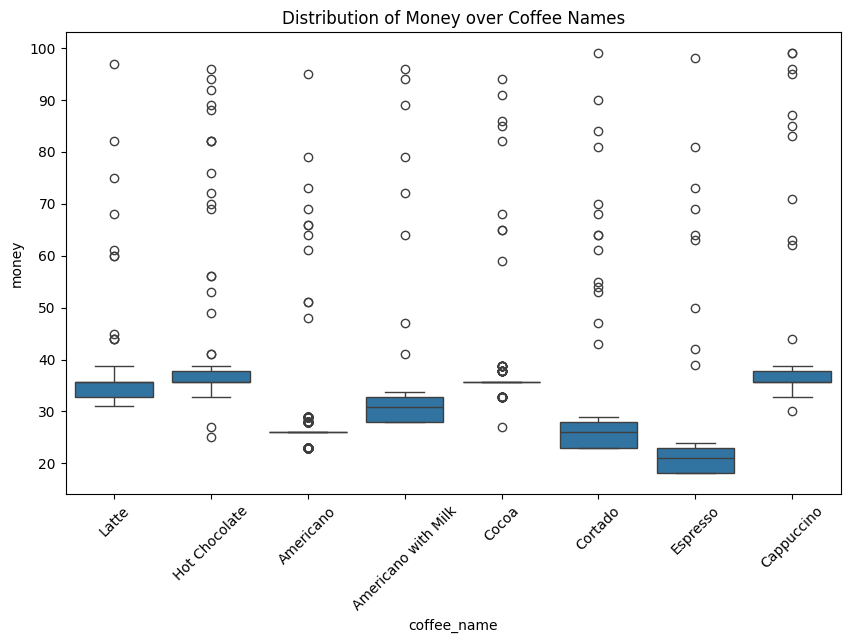

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=coffee_data_new, x='coffee_name', y='money')
plt.xticks(rotation=45)
plt.title("Distribution of Money over Coffee Names")
plt.show()

Q5. How many types of coffees are present in the dataset? (for synthetic dataset)

In [ ]:
types = coffee_data_new['coffee_name'].nunique()
print("Number of coffee types:", types)

Number of coffee types: 8


Q6. Find the average money made at what time of the day.
(for synthetic dataset)

In [ ]:
avg = coffee_data_new.groupby('Time_of_Day')['money'].mean()
print(avg)

Time_of_Day
Afternoon    32.642544
Morning      31.460116
Night        33.702965
Name: money, dtype: float64
